# 1)  Load  "data.csv" dataset and create an ensemble ML model for predicting target variable (Result). Report the performance of the model using appropriate metrics.

In [4]:
import pandas as pd
dataset = pd.read_csv("data_9.csv")
result_dataset = dataset["Result"]
dataset.drop(columns="Result", inplace=True, axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FNL1    17 non-null     int64  
 1   FNL2    17 non-null     int64  
 2   FSP.1   17 non-null     int64  
 3   FSW.1   17 non-null     int64  
 4   SSP.1   17 non-null     int64  
 5   SSW.1   17 non-null     int64  
 6   ACE.1   17 non-null     int64  
 7   DBF.1   17 non-null     float64
 8   WNR.1   17 non-null     int64  
 9   UFE.1   17 non-null     int64  
 10  BPC.1   17 non-null     int64  
 11  BPW.1   17 non-null     int64  
 12  NPA.1   17 non-null     float64
 13  NPW.1   17 non-null     float64
 14  TPW.1   17 non-null     int64  
 15  ST1.1   17 non-null     int64  
 16  ST2.1   17 non-null     float64
 17  ST3.1   17 non-null     float64
 18  ST4.1   17 non-null     float64
 19  ST5.1   17 non-null     float64
 20  FSP.2   17 non-null     int64  
 21  FSW.2   17 non-null     int64  
 22  SSP.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, result_dataset, test_size=0.3, random_state=13)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_clf = RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



We got a 100% correct prediction. on the other hand, we only have 17 records in our sample, what might be not enough for a proper sampling.

# 2) Have you used any hyperparameter tuning while building the model in Q1? If yes, then plot the performances that were obtained at different steps of optimisation. Otherwise, create an optimised model and compare performance with Q1.

Yes I have. I have tried to minimize the number of estimators while maintaingng a good coverage. Still, with a small sampling size, it is quite difficult to get significant differences, but I tried with 5 and 10 estimators, and the model underperformed as shown below:

In [18]:
rf_clf5 = RandomForestClassifier(n_estimators=5)
rf_clf10 = RandomForestClassifier(n_estimators=10)
rf_clf5.fit(X_train, y_train)
pred5 = rf_clf5.predict(X_test)
rf_clf10 = RandomForestClassifier(n_estimators=10)
rf_clf10.fit(X_train, y_train)
pred10 = rf_clf10.predict(X_test)
print(classification_report(y_test, pred5))
print(classification_report(y_test, pred10))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.67      1.00      0.80         2

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



[0.         0.         0.         0.         0.         0.
 0.         0.         0.2        0.07777778 0.         0.2
 0.         0.         0.12222222 0.         0.         0.
 0.         0.2        0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.2        0.         0.         0.         0.
 0.         0.        ]
FNL1     0.0
FNL2     0.0
FSP.1    0.0
FSW.1    0.0
SSP.1    0.0
dtype: float64


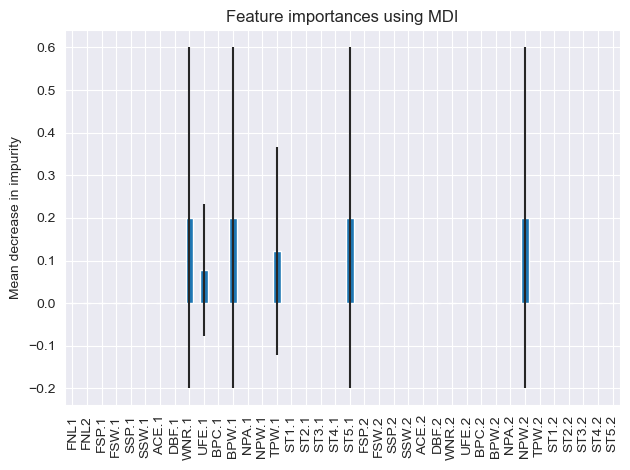

In [14]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf_clf.feature_importances_
print(importances)
forest_importances = pd.Series(importances, index=list(X_train.columns))
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
print(forest_importances.head())
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# 3) Reflect on the importance of hyperparameter tuning of ML models based on your ML model development exercise

Utilizing the correct hyperparameters is paramount to ensure the best possible results on a machine learning model. Either by preventing overfitting or preventing overload, hyperparameters have a huge impact on the result of a model.


# 4) Create a GradientBoost model for the predicting Result using the same dataset that you have used Q1 and report the performance.



In [19]:
from sklearn.ensemble import AdaBoostClassifier
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import clear_output, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
def conmat(y_test, pred):
    fig, ax = plt.subplots(figsize=(10, 5))
    ConfusionMatrixDisplay.from_predictions(y_test, pred, ax=ax)
    _ = ax.set_title(
        f"Confusion Matrix for {rf_clf.__class__.__name__}"
    )

def f(n_estimators,learning_rate):
    abc =AdaBoostClassifier(n_estimators=n_estimators,learning_rate=learning_rate, random_state=0)
    abc.fit(X_train, y_train)
    pred = abc.predict(X_test)
    conmat(y_test, pred)
    print('The accuracy of the RF classifier on test data is {:.2f} out of 1 '.format(abc.score(X_test, y_test)))

interact(f,learning_rate=np.arange(0.1,1,0.1),n_estimators=np.arange(10,800,100));

Analysing the results the model too was able to predict 100% of our test sample (30%). The results indicate 100% true positives, 0% false positives, 100% true negatives and 0% false negatives. Again, the sampling for this dataset is quite low to get a significant variance.


# 5)Compare the performance of two models (Q1 and Q4). Explain which model is good and why.



Both models performed quite well. Still, there was not a significant sample size to do a proper breakdown and ensure more variance on our data, but it was a good start. Both models are good and highly depend on the data you are trying to predict. Ada boost for example is more sensitive to noise in the data, so it's better for clean datasets and binary classification trees. Random Forest on the other hand is less prone to overfitting and more robust to noise.